# Boombike sharing assignment - kamil shaikh 

**Problem statement-**
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free.A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.**BoomBikes** aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.They want to know the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market.
The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### we will be following the given steps to in order to get to the solution.

- DATA reading & understanding
- EDA
- Modelling
   - Data scaling (normalisation or standardisation)
   - model building (linear regression model)
   - model evaluation 
- Interpretation and Suggestion to business

# Reading and Understanding the Data

In [1]:
#importing useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

#ignoring warnings
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#lets look at columns names, whether they are in correct format
df.columns
#loooks good 

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
#check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#check null values by columns
df.isnull().sum()

#no null values so good to go 

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


dropping unncessory features

- drop instant column -- it is just index, so no use
- drop dteday column -- the information is already expressed by yr,mnth,weekday,workingday columns so no use for modelling 
- drop casual and registered -- the dependent variable or target variable is cnt, which is nonthing but addition of these two columns only, so  it will be redundunt to keep these two columns (no analysis is required on this basis of casual/registered)

In [8]:
df.drop(['instant','dteday','casual','registered'],axis='columns',inplace=True)

In [9]:
print(df.columns)
df.shape

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')


(730, 12)

In [10]:
#naming the seasons as per their codes provided and also the month names

df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df.mnth =df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [11]:
df.mnth.value_counts()

dec     62
jan     62
mar     62
july    62
aug     62
oct     62
may     62
june    60
sep     60
apr     60
nov     60
feb     56
Name: mnth, dtype: int64

In [12]:
df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [13]:
df.weathersit.unique()  #our dataset doesnt contain the heavy rain or ice pallets and thunderstorm condition

array([2, 1, 3], dtype=int64)

In [14]:
#so lets just map 1,2,3 as model will not learn anything from 4 condition (no data present at all)

df.weathersit = df.weathersit.map({1:'clear',2:'cloudy',3:'light_rain'})

## EDA

- data visualisation and see if there are any patterns visible

''

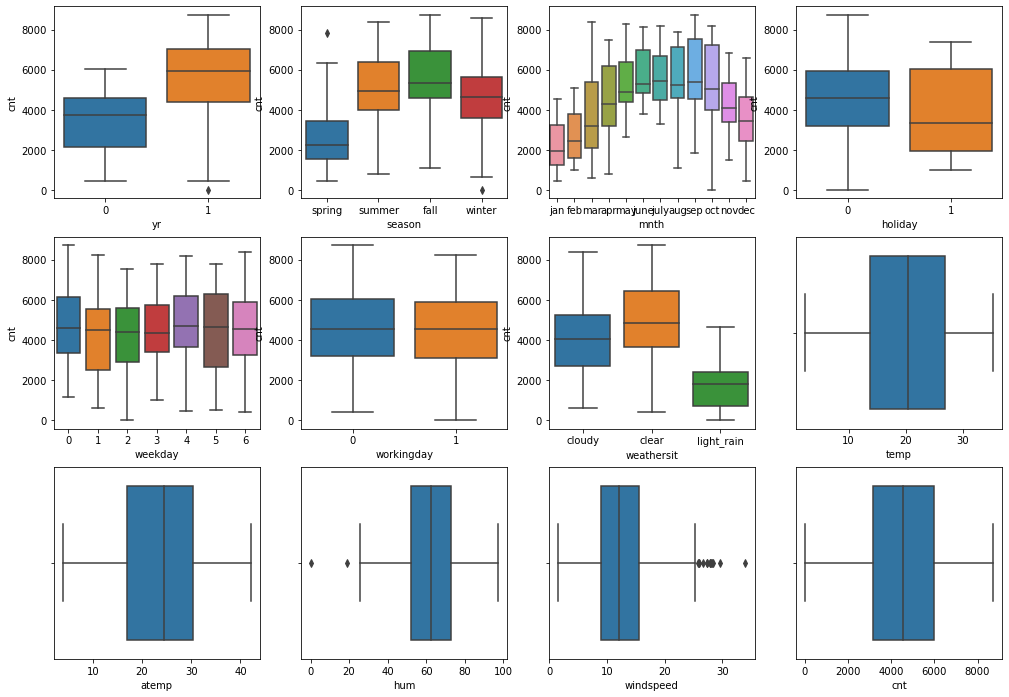

In [15]:
#spottig the outliers

plt.figure(figsize=(17,12))

plt.subplot(3,4,1)
sns.boxplot(data= df,x='yr',y='cnt'),

plt.subplot(3,4,2)
sns.boxplot(data= df,x='season',y='cnt'),

plt.subplot(3,4,3)
sns.boxplot(data= df,x='mnth',y='cnt'),

plt.subplot(3,4,4)
sns.boxplot(data= df,x='holiday',y='cnt'),

plt.subplot(3,4,5)
sns.boxplot(data= df,x='weekday',y='cnt'),

plt.subplot(3,4,6)
sns.boxplot(data= df,x='workingday',y='cnt'),

plt.subplot(3,4,7)
sns.boxplot(data= df,x='weathersit',y='cnt'),

plt.subplot(3,4,8)
sns.boxplot(data= df,x='temp'),

plt.subplot(3,4,9)
sns.boxplot(data= df,x='atemp'),

plt.subplot(3,4,10)
sns.boxplot(data= df,x='hum'),

plt.subplot(3,4,11)
sns.boxplot(data= df,x='windspeed'),

plt.subplot(3,4,12)
sns.boxplot(data= df,x='cnt'),

;

**Inferences-** 
- data seems very well balanced, as there are almost no outliers 
- only weather related parameters like humidity, windspeed, has outliers which is natural, so we will keep it 
- mnth vs cnt clearly shows the dropping cnt after august month
- weathersit boxplot shows clear having highest median value as well as light rain(and thunderstorm) has lowest, which is also understandable 

''

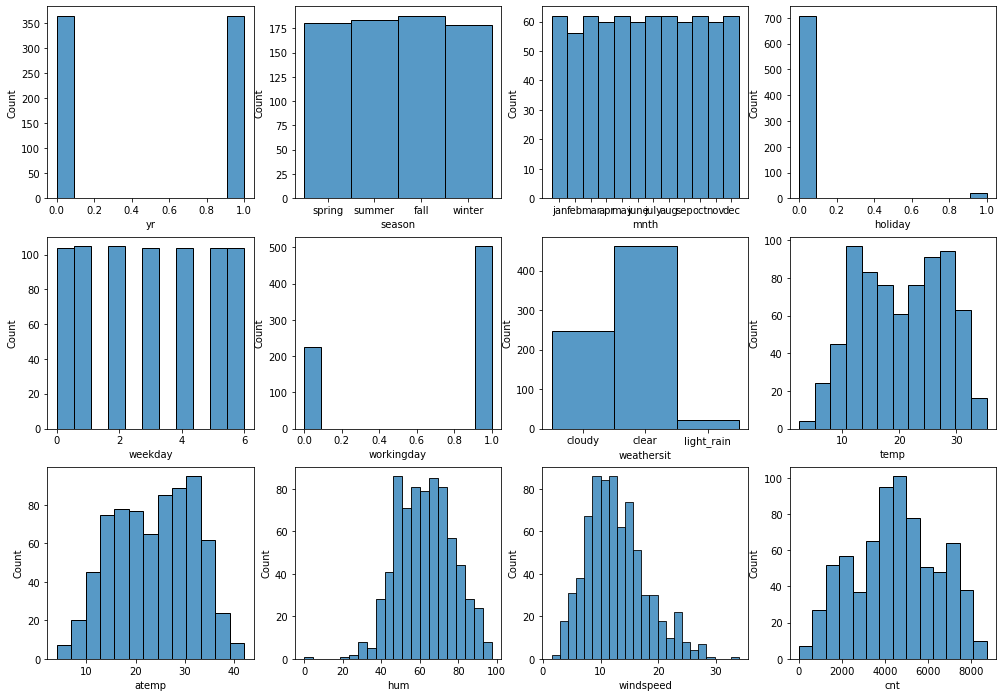

In [16]:
#lets check distributions of the features

plt.figure(figsize=(17,12))

plt.subplot(3,4,1)
sns.histplot(data= df,x='yr'),

plt.subplot(3,4,2)
sns.histplot(data= df,x='season'),

plt.subplot(3,4,3)
sns.histplot(data= df,x='mnth'),

plt.subplot(3,4,4)
sns.histplot(data= df,x='holiday'),

plt.subplot(3,4,5)
sns.histplot(data= df,x='weekday'),

plt.subplot(3,4,6)
sns.histplot(data= df,x='workingday'),

plt.subplot(3,4,7)
sns.histplot(data= df,x='weathersit'),

plt.subplot(3,4,8)
sns.histplot(data= df,x='temp'),

plt.subplot(3,4,9)
sns.histplot(data= df,x='atemp'),

plt.subplot(3,4,10)
sns.histplot(data= df,x='hum'),

plt.subplot(3,4,11)
sns.histplot(data= df,x='windspeed'),

plt.subplot(3,4,12)
sns.histplot(data= df,x='cnt'),

;

**Inference**
- NO anomalies detected, most of the graphs are normally distributed and there doesnt seem any skewing or outliers 

In [17]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

## **bivariate analysis**

<Figure size 1440x1080 with 0 Axes>

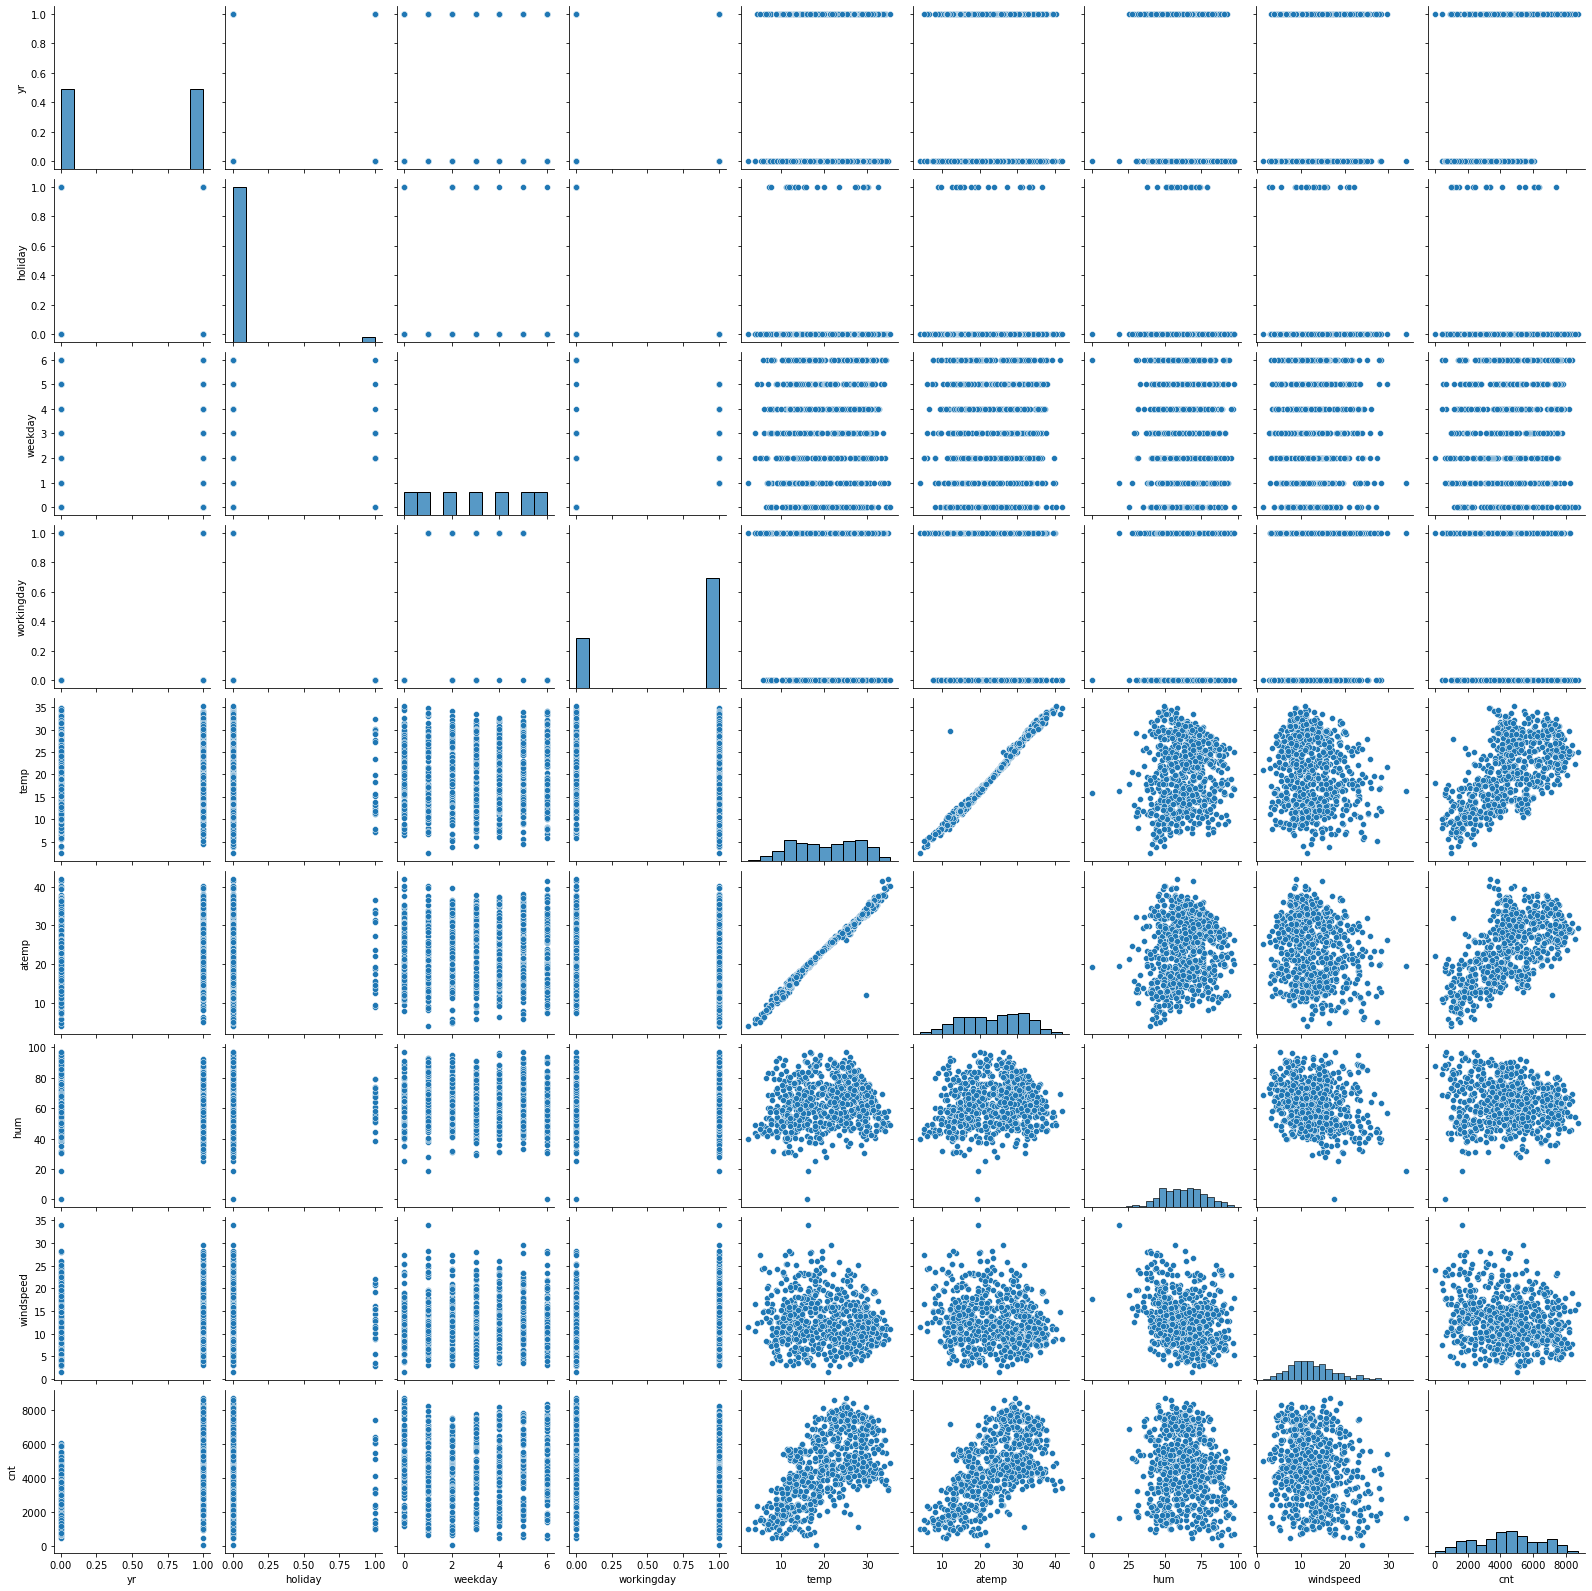

In [18]:
#using pairplots
plt.figure(figsize=(20,15))
sns.pairplot(df);

**Inferences-**
- looks like atemp and temp features have strong linear relationship with our target variable
- atemp and temp looks linear, they will definitely have high correlation(we will check that later also to confirm)
- there does not seem any anomaly, so we can proceed further

we need to do data modifications/ data preparation to feed our algorithm 

- converting categorical variables into numeric variables using dummy variable method

In [19]:
df.head()

#okay so season,weekday,weathersit,month are the categorical variables, we will keep the binary variables as it is 

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,1,1,cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,2,1,cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [20]:
df=pd.get_dummies(data=df, columns=['season','weekday','weathersit','mnth'],drop_first=True)

In [21]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   atemp                  730 non-null    float64
 5   hum                    730 non-null    float64
 6   windspeed              730 non-null    float64
 7   cnt                    730 non-null    int64  
 8   season_spring          730 non-null    uint8  
 9   season_summer          730 non-null    uint8  
 10  season_winter          730 non-null    uint8  
 11  weekday_1              730 non-null    uint8  
 12  weekday_2              730 non-null    uint8  
 13  weekday_3              730 non-null    uint8  
 14  weekday_4              730 non-null    uint8  
 15  weekda

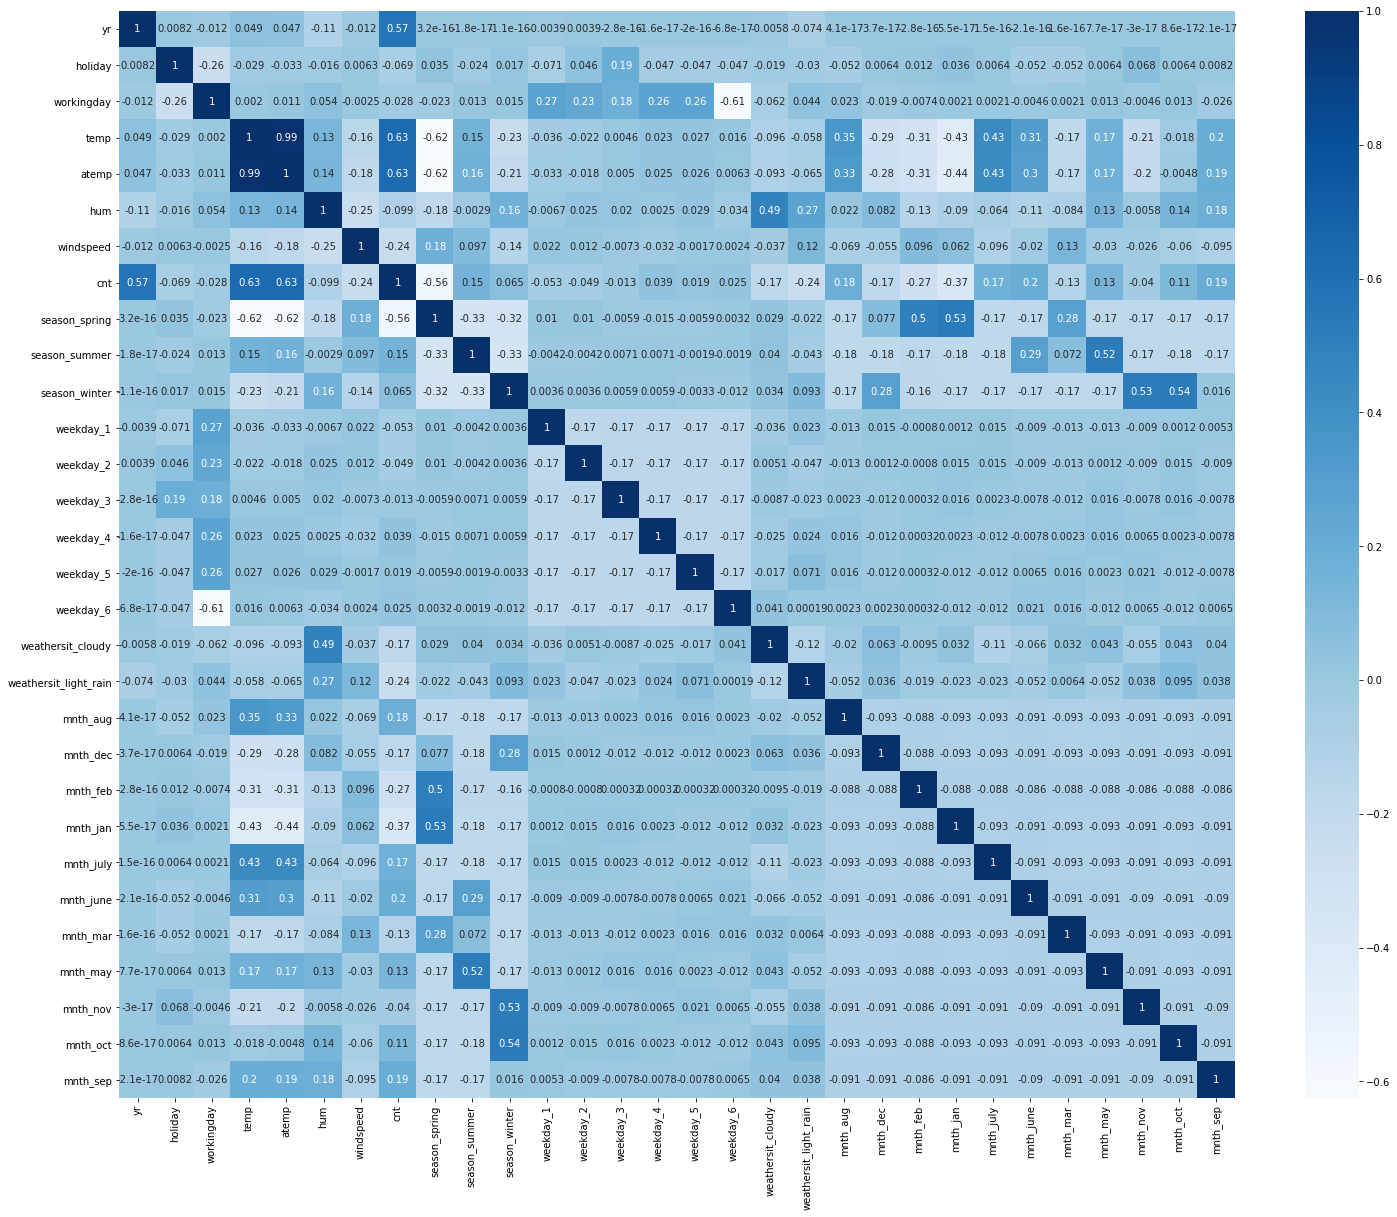

In [23]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True,cmap='Blues');

**Inference-**

- yr and cnt has good correlation, also temp and atemp has high correlation with cnt, hence we can perform linear regression model 
- There is almost no correlation in between the features, except temp and atemp (0.99), this will cause multicolliniarity so we will drop one of the two, other are just fine 
     - temp is absolute temperature (**dry bulb temperature**) in degree celsious, whereas atemp is **'what it feels like'** temperature (or **wet bulb temperature**), here users **comfort** is better defined by the 2nd indicator, we will keep it, and **drop** **temp** 

In [24]:
# drop temp column

df.drop(columns='temp',axis='columns',inplace=True)



In [25]:
df.shape

(730, 29)

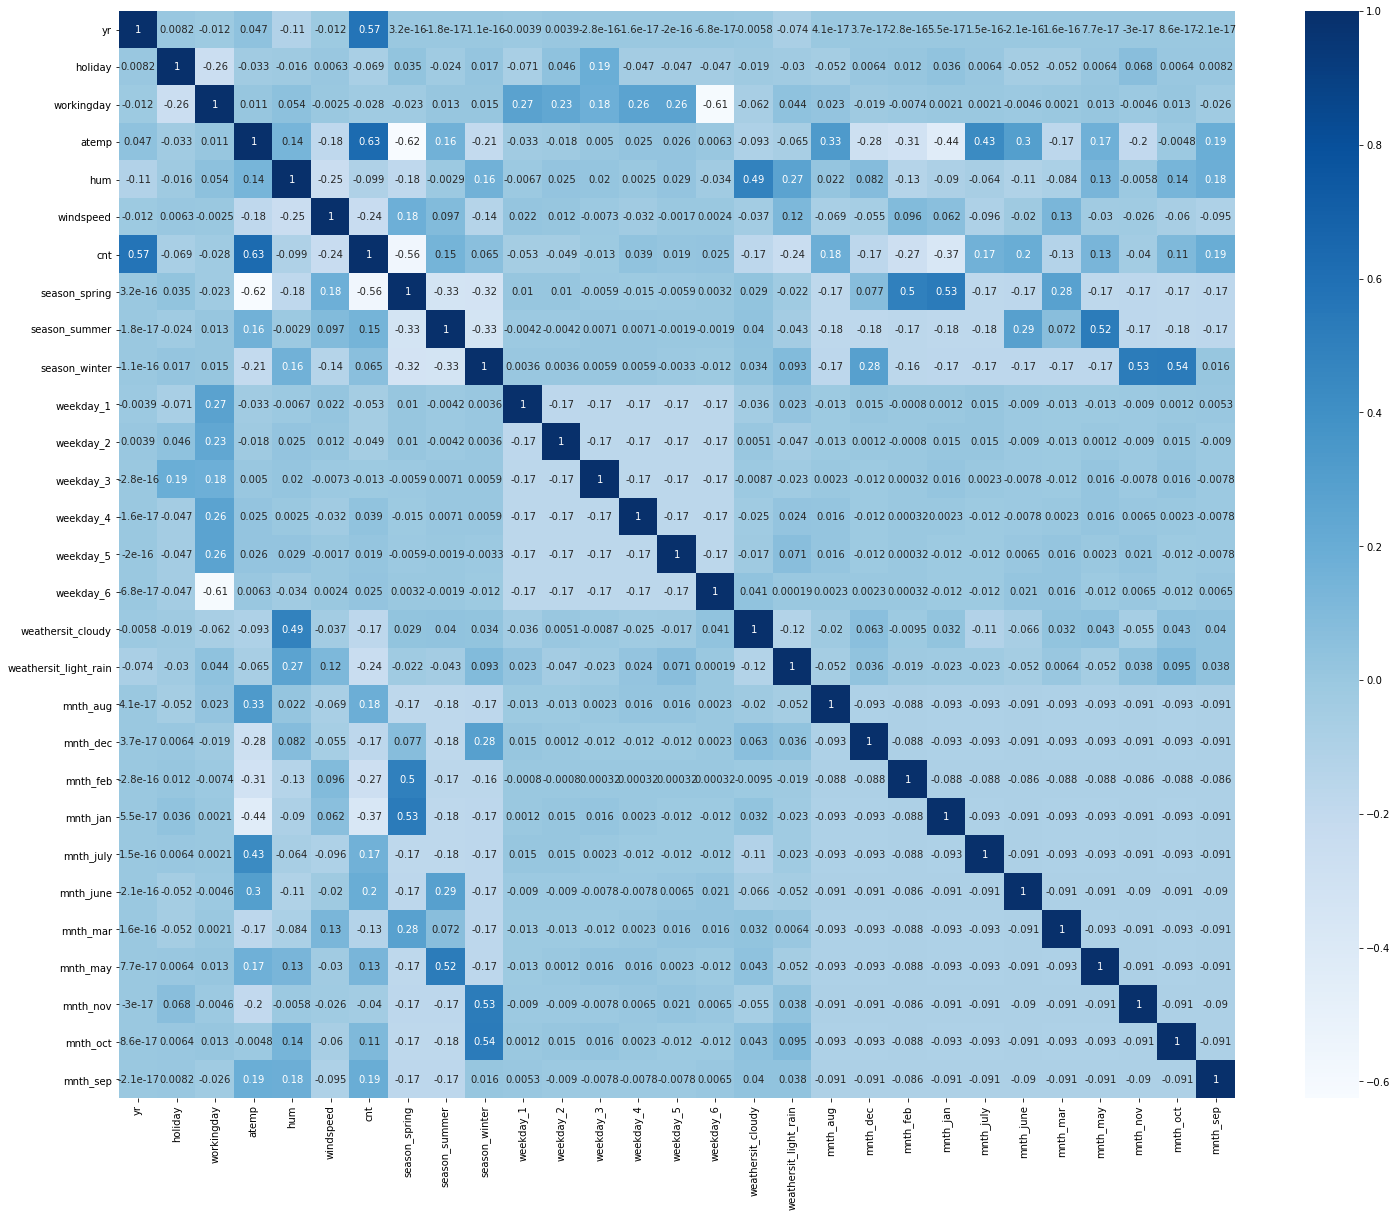

In [26]:
plt.figure(figsize=(25,20))
sns.heatmap(data=df.corr(),annot=True,cmap='Blues');

In [27]:
# perfect for now, we will finetune accordingly 

# Model Building 

if features have very different range, although it deosn't affect the model, but it affects the interpretability, (for large values, coefficients are vary small), so to have easier model evaluation,lets scale the data 1st 

In [28]:
#importing library from sklearn 

from sklearn.preprocessing import MinMaxScaler

In [29]:
scalr = MinMaxScaler()

In [30]:
#now there is no use of scaling the binary variables, so we will just scale other numeric variables

df.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'weathersit_cloudy', 'weathersit_light_rain', 'mnth_aug', 'mnth_dec',
       'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_june', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep'],
      dtype='object')

In [31]:
num_vars=['atemp','hum','windspeed','cnt']

df[num_vars]=scalr.fit_transform(df[num_vars])

In [32]:
df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep
0,0,0,1,0.373517,0.828620,0.284606,0.110792,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0.360541,0.715771,0.466215,0.089623,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0.144830,0.449638,0.465740,0.152669,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0.174649,0.607131,0.284297,0.177174,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0.197158,0.449313,0.339143,0.181546,1,0,0,...,0,0,1,0,0,0,0,0,0,0


**Splitting the Data into Training and Testing Sets**

In [33]:
#we will use scikitlearn library for this 

from sklearn.model_selection import train_test_split

In [34]:
#this requires features as X and target variable as y 

#so lets do it 1st 
y = df.pop('cnt')
X = df

In [35]:
print(X.shape)
print(y.shape)

(730, 28)
(730,)


In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#cool, worked well 

(510, 28)
(220, 28)
(510,)
(220,)


In [38]:
# we will use statsmodel for model building as it gives more stastical results for understanding purpose only
#but for feature selection we will use automated RFE
#(also results are almost same as LinearRegressor from scikitlearn)

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lm = LinearRegression()

## Feature selection 

we have 28 features which is very large number as, our model will tend to overfit, so we will try to reduce as much as we can with increase of accuracy or little to no effect on accuracy.

we will follow mixed approach
- coarse tuning by automated approach
    - Recursive Feature Elimination from sklearn
- fine tuning by manual approach 
    -  statistical regection using VIF,F-stat,p-values etc in stastsmodel 

## step 1 - Automated feature selection 

In [41]:
from sklearn.feature_selection import RFE

In [42]:
lm.fit(X_train, y_train)

rfe = RFE(lm, 16)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [43]:
X_train.columns[rfe.get_support()]

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'weathersit_cloudy',
       'weathersit_light_rain', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_nov', 'mnth_sep'],
      dtype='object')

In [44]:
rfe.score(X_train,y_train)

0.8419522261001813

very solid score I actually tried different numbers and 16 gives by far the best score using somewhat less features (21 is best, as per RFECV)

In [45]:
list(zip(X_train.columns,rfe.get_support(),rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weekday_1', False, 8),
 ('weekday_2', False, 9),
 ('weekday_3', False, 7),
 ('weekday_4', False, 5),
 ('weekday_5', False, 6),
 ('weekday_6', False, 12),
 ('weathersit_cloudy', True, 1),
 ('weathersit_light_rain', True, 1),
 ('mnth_aug', True, 1),
 ('mnth_dec', True, 1),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_july', False, 10),
 ('mnth_june', False, 3),
 ('mnth_mar', False, 13),
 ('mnth_may', False, 2),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 11),
 ('mnth_sep', True, 1)]

In [46]:
#lets see which columns are suggested by RFE

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'weathersit_cloudy',
       'weathersit_light_rain', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_nov', 'mnth_sep'],
      dtype='object')

looks good, lets do manual elimination 

## step 2 - Manual feature selection 

In [47]:
#we will use statsmodel for this step as it has .summery() feature which  tells the whole stat,
#which will be used by us for decision making 
#

In [48]:
import statsmodels.api as sm 

In [49]:
#lets make model using the ref suggested columns (16)
X_train = X_train[col]
X_test = X_test[col]
#for x-intercept we need to add constant column, as statmodel takes origin as intercept for the hypothesis line (which is not always the case)
X_train=sm.add_constant(X_train)
X_test=sm.add_constant(X_test)



In [50]:
print(X_train.shape)
print(X_test.shape)  #cross check 

(510, 17)
(220, 17)


In [51]:
#Ordinary Least Squares method is used to make this model 

lm1 = sm.OLS(y_train,X_train).fit()   # Running the linear model

In [52]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     164.1
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          1.17e-185
Time:                        20:42:12   Log-Likelihood:                 509.34
No. Observations:                 510   AIC:                            -984.7
Df Residuals:                     493   BIC:                            -912.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.33

In [53]:
#lets check VIF also to have better understanding 
#lets just make it a custom function as we will need it again and again 

from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF(X):
    vif = pd.DataFrame()
    X = X_train.drop(columns=['const'])   #local dropping, it wont change the actual df
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [54]:
VIF(X_train)

,Features,VIF
3,hum,32.19
2,atemp,16.68
5,season_spring,5.78
4,windspeed,5.50
7,season_winter,4.36
6,season_summer,3.22
13,mnth_jan,2.36
8,weathersit_cloudy,2.31
0,yr,2.09
12,mnth_feb,1.91


okay so our 1st model has good R2 score as well as good adjusted R2 score 
- variance inflation factor of hum and atemp is very high, but we do not delete both simultaneously as stats change after deletion 
- p-values of almost all the variables are under acceptance level

In [55]:
# dropping humidity 

X_train.drop(columns=['hum'],inplace=True)
X_test.drop(columns=['hum'],inplace=True)

print(X_train.shape)
print(X_test.shape)

(510, 16)
(220, 16)


In [56]:
lm2 = sm.OLS(y_train,X_train).fit()

In [57]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     168.5
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          3.41e-183
Time:                        20:42:12   Log-Likelihood:                 500.75
No. Observations:                 510   AIC:                            -969.5
Df Residuals:                     494   BIC:                            -901.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.26

In [58]:
VIF(X_train)

,Features,VIF
3,windspeed,5.47
2,atemp,5.28
4,season_spring,4.53
6,season_winter,3.15
5,season_summer,2.47
12,mnth_jan,2.20
0,yr,2.07
11,mnth_feb,1.88
13,mnth_nov,1.83
9,mnth_aug,1.70


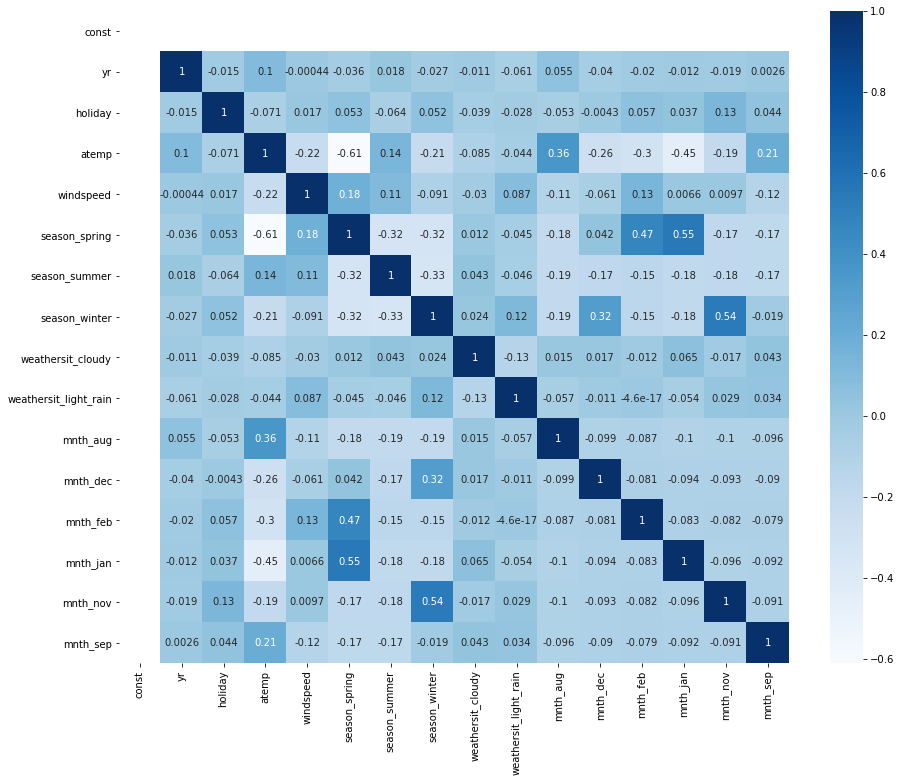

In [59]:
plt.figure(figsize=(15,12))

sns.heatmap(X_train.corr(), annot=True, cmap='Blues');

high correlation between nov - season winter and jan - season spring 

- lets keep season winter and season spring as they are more explainable to business

In [60]:
X_train.drop(columns=['mnth_jan','mnth_nov','mnth_feb'],inplace=True)
X_test.drop(columns=['mnth_jan','mnth_nov','mnth_feb'],inplace=True)

print(X_train.shape)
print(X_test.shape)

(510, 13)
(220, 13)


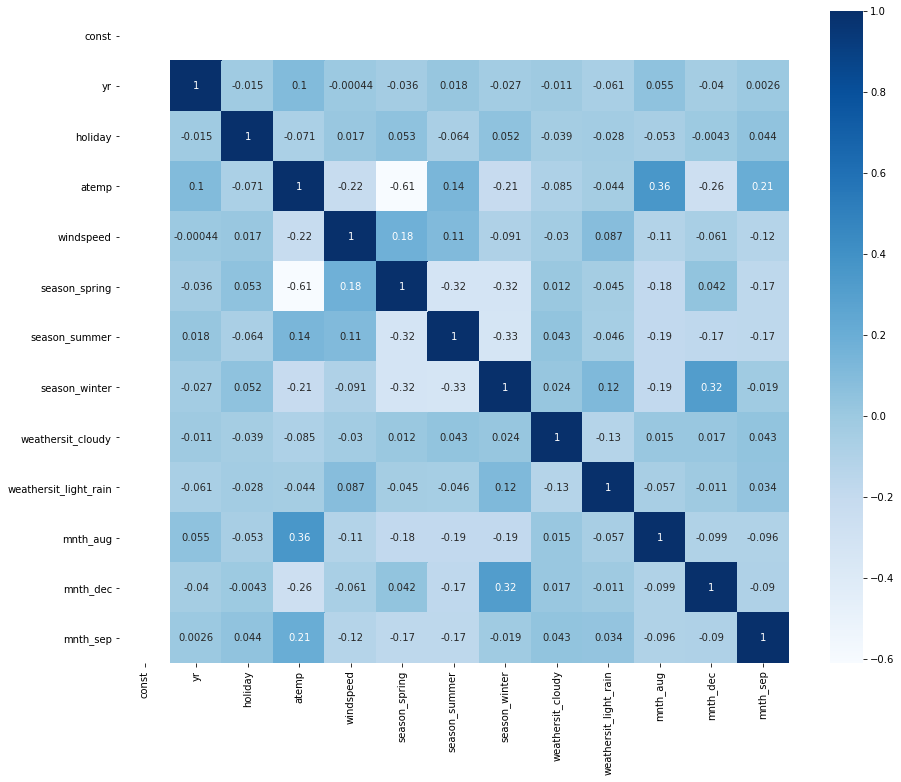

In [61]:
plt.figure(figsize=(15,12))

sns.heatmap(X_train.corr(), annot=True, cmap='Blues');

looks okay to me, august and atemp as correlation, its not too high but lets think after we evaluate new model

In [62]:
lm3 = sm.OLS(y_train,X_train).fit()

In [63]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     204.2
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          2.56e-183
Time:                        20:42:16   Log-Likelihood:                 492.83
No. Observations:                 510   AIC:                            -959.7
Df Residuals:                     497   BIC:                            -904.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.20

In [64]:
VIF(X_train)

,Features,VIF
3,windspeed,5.38
2,atemp,5.16
5,season_summer,2.46
4,season_spring,2.34
6,season_winter,2.20
0,yr,2.07
9,mnth_aug,1.70
7,weathersit_cloudy,1.58
11,mnth_sep,1.37
10,mnth_dec,1.26


the R2 value has decreased by just a margin, and other parameters are also good

- mnth_dec has p value greater than our threshold so lets delete that and see how model performs

In [65]:
X_train.drop(columns=['mnth_dec'],inplace=True)
X_test.drop(columns=['mnth_dec'],inplace=True)

print(X_train.shape)
print(X_test.shape)

(510, 12)
(220, 12)


In [66]:
lm4 = sm.OLS(y_train,X_train).fit()

In [67]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     222.2
Date:                Wed, 08 Dec 2021   Prob (F-statistic):          4.14e-184
Time:                        20:42:16   Log-Likelihood:                 491.90
No. Observations:                 510   AIC:                            -959.8
Df Residuals:                     498   BIC:                            -909.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.19

In [68]:
VIF(X_train)

,Features,VIF
3,windspeed,5.38
2,atemp,5.16
5,season_summer,2.46
4,season_spring,2.29
0,yr,2.07
6,season_winter,1.95
9,mnth_aug,1.70
7,weathersit_cloudy,1.58
10,mnth_sep,1.37
8,weathersit_light_rain,1.08


yes, that did well too, we still have very good R2 (83.4%) as well as adjusted R2 (83%)
- I do not see any other statistical reason to eliminate more variables
- lets use this model as our best model

## Residual Analysis of the train data

In [69]:
y_train_pred = lm4.predict(X_train)

In [70]:
res = y_train - y_train_pred

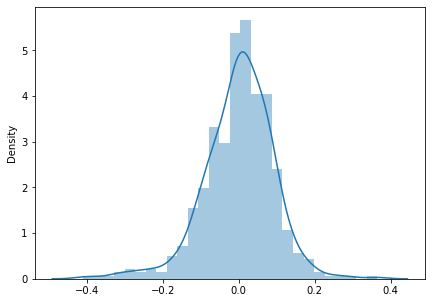

In [71]:
plt.figure(figsize=(7,5))

sns.distplot(res);

**Nice normally distributed curve with mean almost at zero, the primary condition of linear regression model holds true here**

# Model Evaluation 

Now the real test, to predict the test dataset

In [72]:
y_test_pred = lm4.predict(X_test)

In [73]:
res1 = y_test - y_test_pred

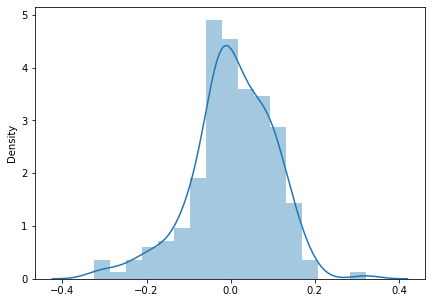

In [74]:
plt.figure(figsize=(7,5))

sns.distplot(res1);

This one is decent enought too we can go with it 

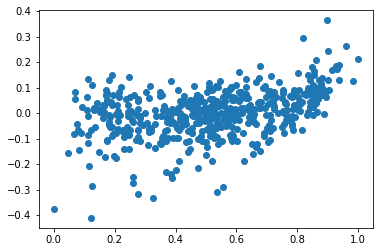

In [75]:
#checking constant variance in error terms (homoscedasticity)
plt.scatter(y_train,res);

**lets check and compare the R2 and adjusted R2 score of both train and test datasets**

In [76]:
from sklearn.metrics import r2_score
print('R2 score of train data- ',r2_score(y_train,y_train_pred))
print('R2 score of test data-  ',r2_score(y_test,y_test_pred))

R2 score of train data-  0.8307681030355251
R2 score of test data-   0.8034724945845437


In [77]:
Adj_r2_test = 1 - (1-r2_score(y_test, y_test_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_r2_train = 1 - (1-r2_score(y_train, y_train_pred)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

In [78]:
print('adjusted R2 score of train data- ',Adj_r2_train)
print('adjusted R2 score of test data-  ',Adj_r2_test)

adjusted R2 score of train data-  0.8266820210162621
adjusted R2 score of test data-   0.7920795957198796


### Following things can be observed 

- Difference in R2 scores between train and test: 3%
- Difference in adjusted R2 scores between train and test: 1%
- Reseduals are normally distributed for both train and test datasets with mean appx.= 0

Lets just plot to see visually how line is fitted

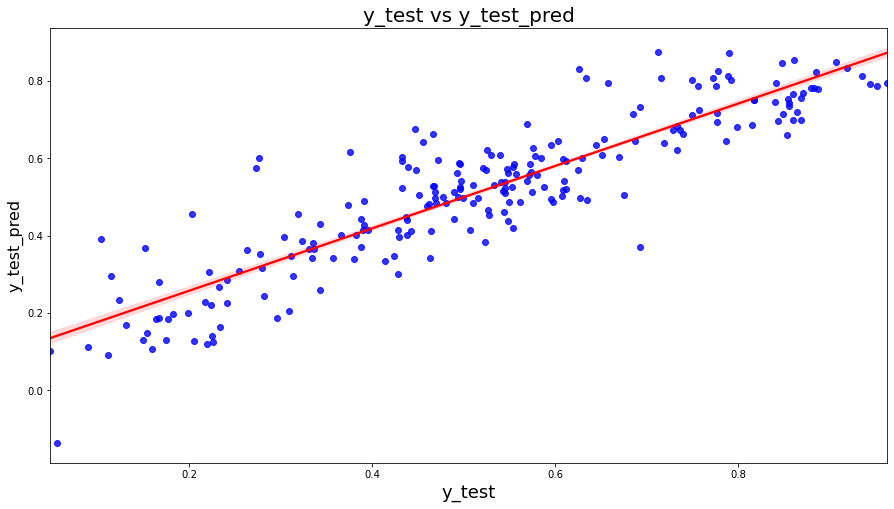

In [79]:
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label
plt.show()


# Interpretation and suggestion to business

The model performed well, we were able to reduce number of variables to 12(11 features & a constant) from 30 originally, however this can further be refined by using advanced feature selection techniques like **LASSO** and optimal parameters can be found using **GridsearchCV**.

the equation looks like

$ Totalbikes = 0.4746 \times atemp+0.10546 \times September+0.0692 \times summer+0.0947 \times winter+0.2347 \times Year−0.0920 \times holiday−0.13536 \times windspeed-0.0553 \times spring-0.0816 \times cloudy-0.2792 \times lightrain+0.0497 \times august+0.1964 \times const $

## Business suggestions

- The most important factor turned out to be temperature, the boombikes can reduce their resources during the hot days, so as to save expenditure

- There is a significant increment in the count in september month, as The USA enjoys a beautiful climate in September with plenty of warm sunshine and clear blue skies for most of the month. This can be used to increase the capacity and maybe they can market their product more agressively just before september so than they can get more users.

- year shows strong relationship, which indicates that the awareness about the product is increasing and also people are using it more, but this dip in the last few months can also be due to corona virus fear, as it is a 'sharing' product company, so more safety features related to corona can be implemented so as to make people feel safer.

- windspeed is one of the most negatively impacting thing alongwith light rain, this cannot be control though, we can just reduce the resorces into areas where this happens very often.
    - Hawaii overall is the rainiest state in the US
    - During summer, the country's rainiest weather creeps northward into Iowa, West Virginia and New Jersey. While in fall and winter, the northern coastal states of Washington, Massachusetts and Rhode Island join the list of ten rainiest states.
